In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os

# Add the parent directory to the path so we can import the module
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
import modules.needleman_wunsch as nw

In [8]:
def mat_distances(liste_de_sequences, blosum_m, gap_opening_score, gap_extension_score, print_result=False, identity_score=1, substitution_score=-1):
  """
    Compute a pairwise distance matrix for the given sequences.

    Parameters:
    ----------
    sequence_list : list of str
        A list of sequences to compare.
    cost_fun : function
        A function that computes the alignment cost between two sequences.

    Returns:
    -------
    distance_matrix : list of list of int
        A symmetric matrix containing the pairwise distances between sequences.
    """
  matD=[[0 for j in range(len(liste_de_sequences))] for i in range(len(liste_de_sequences))]
  for i in range(len(liste_de_sequences)):
    for j in range(len(liste_de_sequences)):
      if j>=i:
        # matD[i][j]=seq_align(liste_de_sequences[i], liste_de_sequences[j], cost_fun)[0]
        matD[i][j], align =nw.needleman_wunsch([liste_de_sequences[i], liste_de_sequences[j]], blosum_m, gap_opening_score, gap_extension_score, print_result=False, identity_score=1, substitution_score=-1)
        print("Alignement entre ", liste_de_sequences[i], " et ", liste_de_sequences[j], " : ", align)
        print("Score : ", matD[i][j])  
        matD[j][i]=matD[i][j]
  return matD


In [18]:
gapPenalty=-4
identity=1
substitution=-1
sequence_list = ["CHAT","CAT","HER"]

matrix = mat_distances(sequence_list, False, gapPenalty, gapPenalty, print_result=False, identity_score=identity, substitution_score=substitution)

Alignement entre  CHAT  et  CHAT  :  ['CHAT', 'CHAT']
Score :  4.0
Alignement entre  CHAT  et  CAT  :  ['C-AT', 'CHAT']
Score :  -1.0
Alignement entre  CHAT  et  HER  :  ['-HER', 'CHAT']
Score :  -5.0
Alignement entre  CAT  et  CAT  :  ['CAT', 'CAT']
Score :  3.0
Alignement entre  CAT  et  HER  :  ['HER', 'CAT']
Score :  -3.0
Alignement entre  HER  et  HER  :  ['HER', 'HER']
Score :  3.0


In [19]:
score, align = nw.needleman_wunsch(["CAT", "CHAT"], False, gapPenalty, gapPenalty, print_result=False, identity_score=identity, substitution_score=substitution)
nw.print_alignments(align)
print("Score : ", score)

Alignments:
CHAT
CAT
Score :  -1.0


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def print_dist_matrix(matrix, sequences):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Convert matrix to numpy array, replacing None with 0
    matrix_df = pd.DataFrame(matrix)
    matrix_np = matrix_df.fillna(0).to_numpy()

    row_labels = sequences
    col_labels = sequences

    # Create a heatmap with custom labels
    sns.heatmap(matrix_np.astype(float), annot=True, fmt=".0f", cmap="Blues", linewidths=0.5, 
                ax=ax, cbar=False, xticklabels=col_labels, yticklabels=row_labels)
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    ax.set_title("Distance matrix")
    plt.show()

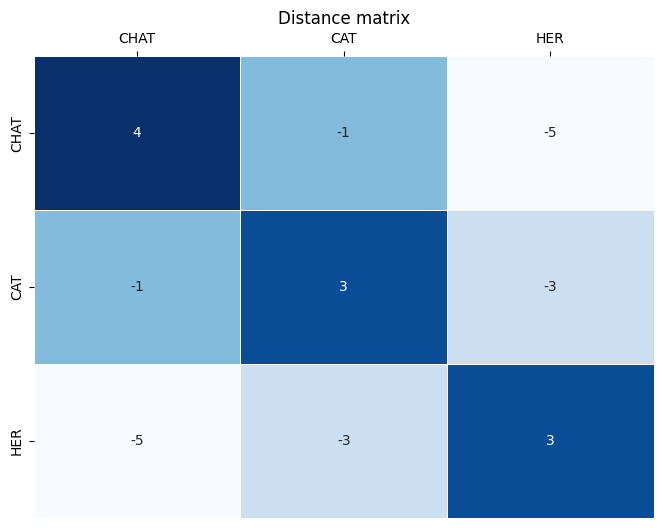

In [25]:
print_dist_matrix(matrix, sequence_list)